In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from arch import arch_model

In [50]:
# Function to calculate historical volatility
def calculate_historical_vols(df, sessions_in_year):
    # Calculate first log returns using the open
    log_returns = []
    log_returns.append(np.log(df.iloc[0]['Close'] / df.iloc[0]['Open']))
    
    # Calculate all but first log returns using close to close
    for index in range(len(df) - 1):
        log_returns.append(np.log(df.iloc[index + 1]['Close'] / df.iloc[index]['Close']))
    df = df.assign(log_returns=log_returns)

    # Log returns squared - using high and low - for Parkinson volatility
    high_low_log_returns_squared = []
    for index in range(len(df)):
        high_low_log_returns_squared.append(np.log(df.iloc[index]['High'] / df.iloc[index]['Low']) ** 2)
    df = df.assign(high_low_log_returns_squared=high_low_log_returns_squared)

    # Calculate the 7-day standard deviation and vol
    if len(df) > 6:
        sd_7_day, vol_7_day, park_vol_7_day = [], [], []
        for index in range(6):
            sd_7_day.append(np.nan)
            vol_7_day.append(np.nan)
            park_vol_7_day.append(np.nan)
        for index in range(len(df) - 6):
            sd = np.std(df.iloc[index:index + 7]['log_returns'], ddof=1)
            sd_7_day.append(sd)
            vol_7_day.append(sd * np.sqrt(sessions_in_year))
            park_vol_7_day.append(np.sqrt(
                (1 / (4 * 7 * np.log(2)) * sum(df.iloc[index:index + 7]['high_low_log_returns_squared']))) * np.sqrt(
                sessions_in_year))
        df = df.assign(sd_7_day=sd_7_day)
        df = df.assign(vol_7_day=vol_7_day)
        df = df.assign(park_vol_7_day=park_vol_7_day)

    # Calculate the 30-day standard deviation and vol
    if len(df) > 29:
        sd_30_day, vol_30_day, park_vol_30_day = [], [], []
        for index in range(29):
            sd_30_day.append(np.nan)
            vol_30_day.append(np.nan)
            park_vol_30_day.append(np.nan)
        for index in range(len(df) - 29):
            sd = np.std(df.iloc[index:index + 30]['log_returns'], ddof=1)
            sd_30_day.append(sd)
            vol_30_day.append(sd * np.sqrt(sessions_in_year))
            park_vol_30_day.append(np.sqrt(
                (1 / (4 * 30 * np.log(2)) * sum(df.iloc[index:index + 30]['high_low_log_returns_squared']))) * np.sqrt(
                sessions_in_year))
        df = df.assign(sd_30_day=sd_30_day)
        df = df.assign(vol_30_day=vol_30_day)
        df = df.assign(park_vol_30_day=park_vol_30_day)

    # Calculate the 60-day standard deviation and vol
    if len(df) > 59:
        sd_60_day, vol_60_day, park_vol_60_day = [], [], []
        for index in range(59):
            sd_60_day.append(np.nan)
            vol_60_day.append(np.nan)
            park_vol_60_day.append(np.nan)
        for index in range(len(df) - 59):
            sd = np.std(df.iloc[index:index + 60]['log_returns'], ddof=1)
            sd_60_day.append(sd)
            vol_60_day.append(sd * np.sqrt(sessions_in_year))
            park_vol_60_day.append(np.sqrt(
                (1 / (4 * 60 * np.log(2)) * sum(df.iloc[index:index + 60]['high_low_log_returns_squared']))) * np.sqrt(
                sessions_in_year))
        df = df.assign(sd_60_day=sd_60_day)
        df = df.assign(vol_60_day=vol_60_day)
        df = df.assign(park_vol_60_day=park_vol_60_day)

    # Calculate the 90-day standard deviation and vol
    if len(df) > 89:
        sd_90_day, vol_90_day, park_vol_90_day = [], [], []
        for index in range(89):
            sd_90_day.append(np.nan)
            vol_90_day.append(np.nan)
            park_vol_90_day.append(np.nan)
        for index in range(len(df) - 89):
            sd = np.std(df.iloc[index:index + 90]['log_returns'], ddof=1)
            sd_90_day.append(sd)
            vol_90_day.append(sd * np.sqrt(sessions_in_year))
            park_vol_90_day.append(np.sqrt(
                (1 / (4 * 90 * np.log(2)) * sum(df.iloc[index:index + 90]['high_low_log_returns_squared']))) * np.sqrt(
                sessions_in_year))
        df = df.assign(sd_90_day=sd_90_day)
        df = df.assign(vol_90_day=vol_90_day)
        df = df.assign(park_vol_90_day=park_vol_90_day)

    # Calculate the 180-day standard deviation and vol
    if len(df) > 179:
        sd_180_day, vol_180_day, park_vol_180_day = [], [], []
        for index in range(179):
            sd_180_day.append(np.nan)
            vol_180_day.append(np.nan)
            park_vol_180_day.append(np.nan)
        for index in range(len(df) - 179):
            sd = np.std(df.iloc[index:index + 180]['log_returns'], ddof=1)
            sd_180_day.append(sd)
            vol_180_day.append(sd * np.sqrt(sessions_in_year))
            park_vol_180_day.append(np.sqrt(
                (1 / (4 * 180 * np.log(2)) * sum(df.iloc[index:index + 180]['high_low_log_returns_squared']))) * np.sqrt(
                sessions_in_year))
        df = df.assign(sd_180_day=sd_180_day)
        df = df.assign(vol_180_day=vol_180_day)
        df = df.assign(park_vol_180_day=park_vol_180_day)

    return df

In [51]:
# Parameters
sessions_in_year = 252  # Assuming the stock market is open ~252 days/year
ticker = 'AMD' 
start_date = '2023-01-01'
end_date = '2024-08-21'

In [52]:
# Fetch historical stock data using yfinance
df = yf.download(ticker, start=start_date, end=end_date)
df['Date'] = df.index  # Use index as Date column
df = calculate_historical_vols(df, sessions_in_year)

[*********************100%%**********************]  1 of 1 completed


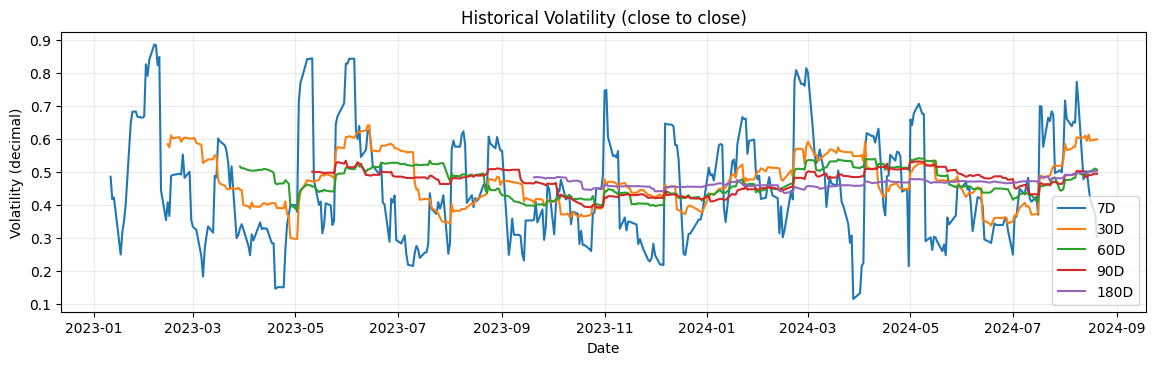

In [53]:
# Plot the volatility charts
plt.figure(figsize=(14, 8))

# Plot historical volatility: CLOSE TO CLOSE
plt.subplot(2, 1, 1)
plt.plot(df['Date'], df['vol_7_day'], label='7D', color='#1f77b4')
plt.plot(df['Date'], df['vol_30_day'], label='30D', color='#ff7f0e')
plt.plot(df['Date'], df['vol_60_day'], label='60D', color='#2ca02c')
plt.plot(df['Date'], df['vol_90_day'], label='90D', color='#d62728')
plt.plot(df['Date'], df['vol_180_day'], label='180D', color='#9467bd')
plt.xlabel('Date')
plt.ylabel('Volatility (decimal)')
plt.title('Historical Volatility (close to close)')
plt.legend()
plt.grid(True, alpha=0.25)

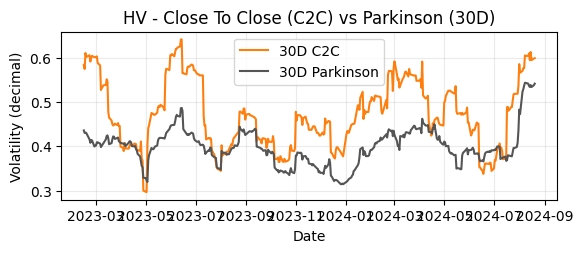

In [54]:
# Plot CLOSE TO CLOSE vs Parkinson volatility for a selected period
plt.subplot(2, 1, 2)
selected_period = "30D"
if selected_period == "7D":
    plt.plot(df['Date'], df['vol_7_day'], label='7D C2C', color='#1f77b4')
    plt.plot(df['Date'], df['park_vol_7_day'], label='7D Parkinson', color='#555555')
elif selected_period == "30D":
    plt.plot(df['Date'], df['vol_30_day'], label='30D C2C', color='#ff7f0e')
    plt.plot(df['Date'], df['park_vol_30_day'], label='30D Parkinson', color='#555555')
elif selected_period == "60D":
    plt.plot(df['Date'], df['vol_60_day'], label='60D C2C', color='#2ca02c')
    plt.plot(df['Date'], df['park_vol_60_day'], label='60D Parkinson', color='#555555')
elif selected_period == "90D":
    plt.plot(df['Date'], df['vol_90_day'], label='90D C2C', color='#d62728')
    plt.plot(df['Date'], df['park_vol_90_day'], label='90D Parkinson', color='#555555')
elif selected_period == "180D":
    plt.plot(df['Date'], df['vol_180_day'], label='180D C2C', color='#9467bd')
    plt.plot(df['Date'], df['park_vol_180_day'], label='180D Parkinson', color='#555555')

plt.xlabel('Date')
plt.ylabel('Volatility (decimal)')
plt.title(f'HV - Close To Close (C2C) vs Parkinson ({selected_period})')
plt.legend()
plt.grid(True, alpha=0.25)

plt.show()

[*********************100%%**********************]  1 of 1 completed


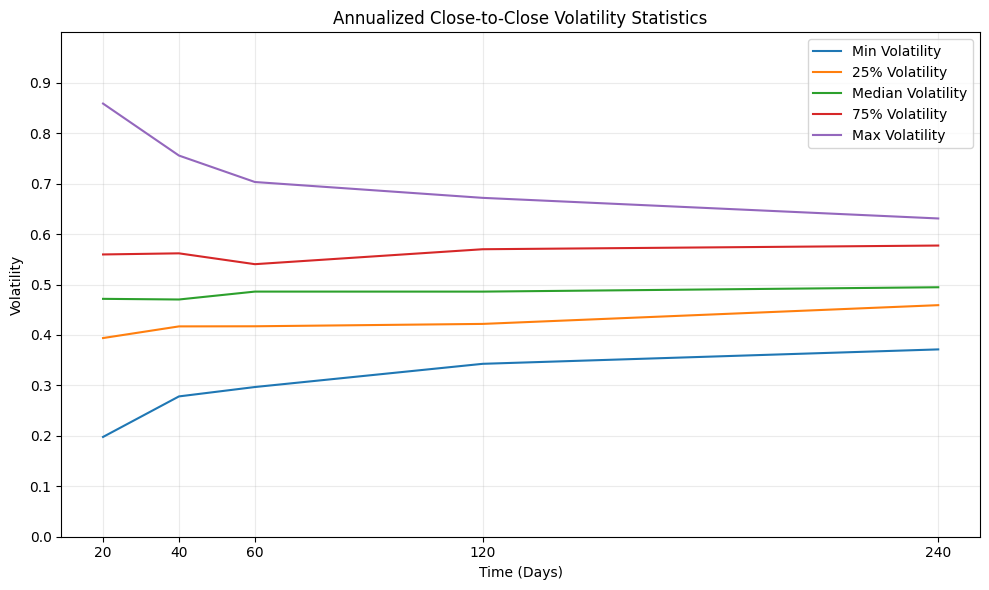

In [55]:
# Function to calculate historical volatility
def calculate_historical_vols(df, sessions_in_year):
    # Calculate first log returns using the open
    log_returns = []
    log_returns.append(np.log(df.iloc[0]['Close'] / df.iloc[0]['Open']))
    
    # Calculate all but first log returns using close to close
    for index in range(len(df) - 1):
        log_returns.append(np.log(df.iloc[index + 1]['Close'] / df.iloc[index]['Close']))
    df = df.assign(log_returns=log_returns)

    # Define periods for volatility calculation
    periods = [20, 40, 60, 120, 240]
    for period in periods:
        if len(df) > period - 1:
            sd_list, vol_list = [], []
            for index in range(period - 1):
                sd_list.append(np.nan)
                vol_list.append(np.nan)
            for index in range(len(df) - period + 1):
                sd = np.std(df.iloc[index:index + period]['log_returns'], ddof=1)
                sd_list.append(sd)
                vol_list.append(sd * np.sqrt(sessions_in_year))
            df = df.assign(**{f'sd_{period}_day': sd_list})
            df = df.assign(**{f'vol_{period}_day': vol_list})

    return df

# Parameters
sessions_in_year = 252  # Assuming the stock market is open ~252 days/year
ticker = 'AMD'  
start_date = '2020-08-21'
end_date = '2024-08-21'

# Fetch historical stock data using yfinance
df = yf.download(ticker, start=start_date, end=end_date)
df['Date'] = df.index  # Use index as Date column
df = calculate_historical_vols(df, sessions_in_year)

# Calculate the required statistics for each period
volatility_stats = {}
periods = [20, 40, 60, 120, 240]
for period in periods:
    vol_data = df[f'vol_{period}_day'].dropna()
    volatility_stats[period] = {
        'min': vol_data.min(),
        '25%': vol_data.quantile(0.25),
        'median': vol_data.median(),
        '75%': vol_data.quantile(0.75),
        'max': vol_data.max()
    }

# Plot the volatility statistics
plt.figure(figsize=(10, 6))

# Plot lines for each statistic
for stat in ['min', '25%', 'median', '75%', 'max']:
    plt.plot(periods, [volatility_stats[period][stat] for period in periods], label=f'{stat.capitalize()} Volatility')

plt.xlabel('Time (Days)')
plt.ylabel('Volatility')
plt.title('Annualized Close-to-Close Volatility Statistics')
plt.xticks([20, 40, 60, 120, 240])
plt.yticks(np.arange(0, 1.0, 0.1))
plt.ylim(0, 1.0)
plt.grid(True, alpha=0.25)
plt.legend()
plt.tight_layout()
plt.show()

[*********************100%%**********************]  1 of 1 completed
/Users/jeffreyju/Documents/Coding_project/Option_Models/garch/lib/python3.11/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001194. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/jeffreyju/Documents/Coding_project/Option_Models/garch/lib/python3.11/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001193. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either resc

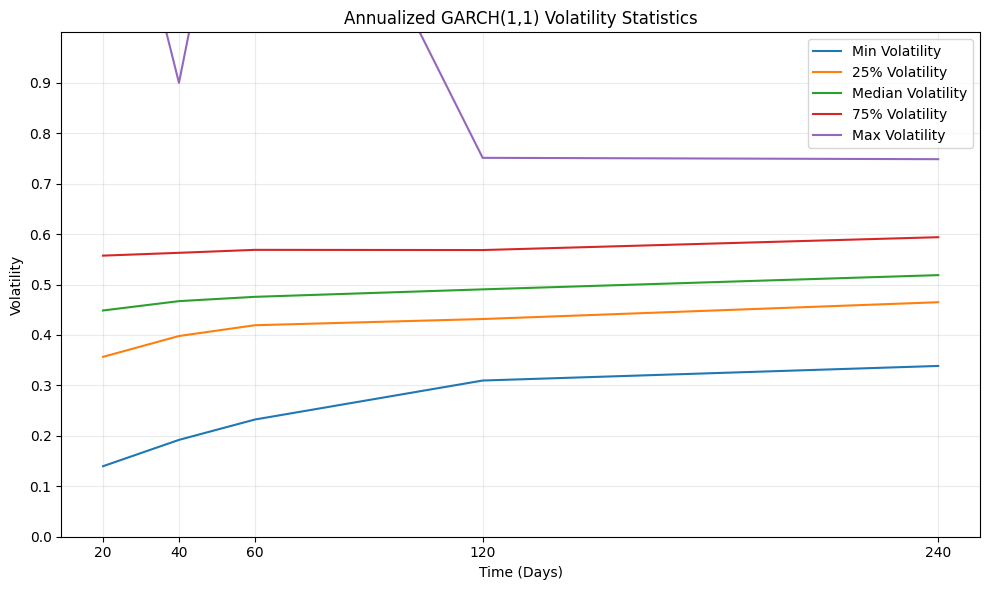

In [45]:
# Function to calculate GARCH(1,1) volatility
def calculate_garch_volatility(df, periods):
    # Calculate log returns
    df['log_returns'] = np.log(df['Close'] / df['Close'].shift(1))
    df = df.dropna()
    
    volatility_stats = {}
    
    # Fit GARCH(1,1) model and calculate annualized volatility
    for period in periods:
        garch_vol = [np.nan] * (period - 1)  # Pad the beginning with NaNs
        for i in range(period, len(df) + 1):
            window_returns = df['log_returns'].iloc[i-period:i]
            model = arch_model(window_returns, vol='Garch', p=1, q=1)
            model_fit = model.fit(disp="off")
            # Annualize the volatility using the number of trading sessions
            annualized_vol = np.sqrt(252) * model_fit.conditional_volatility.iloc[-1]
            garch_vol.append(annualized_vol)
        
        df[f'garch_vol_{period}_day'] = garch_vol
        
        vol_data = df[f'garch_vol_{period}_day'].dropna()
        volatility_stats[period] = {
            'min': vol_data.min(),
            '25%': vol_data.quantile(0.25),
            'median': vol_data.median(),
            '75%': vol_data.quantile(0.75),
            'max': vol_data.max()
        }
        
    return df, volatility_stats

# Parameters
sessions_in_year = 252  # Assuming the stock market is open ~252 days/year
ticker = 'AMD'  
start_date = '2020-08-21'
end_date = '2024-08-21'

# Fetch historical stock data using yfinance
df = yf.download(ticker, start=start_date, end=end_date)
df['Date'] = df.index  # Use index as Date column

# Define periods
periods = [20, 40, 60, 120, 240]

# Calculate GARCH(1,1) volatility
df, volatility_stats = calculate_garch_volatility(df, periods)

# Plot the volatility statistics
plt.figure(figsize=(10, 6))

# Plot lines for each statistic
for stat in ['min', '25%', 'median', '75%', 'max']:
    plt.plot(periods, [volatility_stats[period][stat] for period in periods], label=f'{stat.capitalize()} Volatility')

plt.xlabel('Time (Days)')
plt.ylabel('Volatility')
plt.title('Annualized GARCH(1,1) Volatility Statistics')
plt.xticks([20, 40, 60, 120, 240])
plt.yticks(np.arange(0, 1.0, 0.1))
plt.ylim(0, 1.0)
plt.grid(True, alpha=0.25)
plt.legend()
plt.tight_layout()
plt.show()